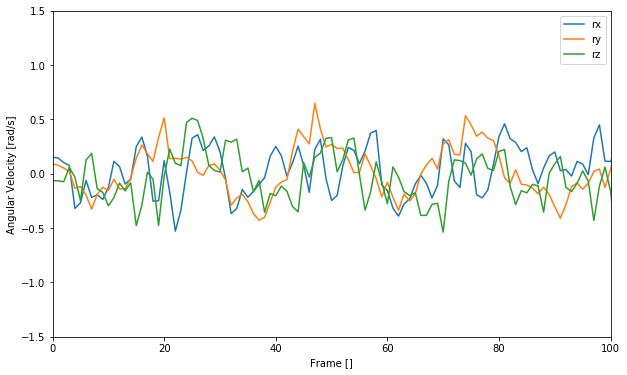

In [1]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

with open('../build/latest_estimated_angular_velocity.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # ヘッダー行を読み飛ばし

    data = []
    for row in reader:
        data.append(row)

legends = [i for i in header]
data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
# data = [print(row) for row in data]  # 文字列を数値に変換
# X軸に時間を、Y軸にデータをセット
t = [row[legends.index('Frame')] for row in data]
rx = [row[legends.index('rx')] for row in data]
ry = [row[legends.index('ry')] for row in data]
rz = [row[legends.index('rz')] for row in data]

plt.figure(figsize=(10,6))

plt.plot(t, rx, label='rx')
plt.plot(t, ry, label='ry')
plt.plot(t, rz, label='rz')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Angular Velocity [rad/s]')
plt.ylim(-1.5,1.5)
plt.xlim(0,100)
plt.show()

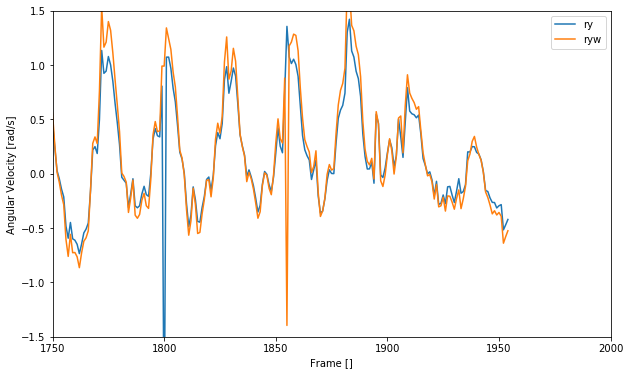

In [8]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

with open('../build/latest_warped_estimated_angular_velocity.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # ヘッダー行を読み飛ばし

    data = []
    for row in reader:
        data.append(row)

legends = [i for i in header]
data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
# data = [print(row) for row in data]  # 文字列を数値に変換
# X軸に時間を、Y軸にデータをセット
t = [row[legends.index('Frame')] for row in data]
rxw = [row[legends.index('rx')] for row in data]
ryw = [row[legends.index('ry')] for row in data]
rzw = [row[legends.index('rz')] for row in data]

plt.figure(figsize=(10,6))

# plt.plot(t, rx, label='rx')
plt.plot(t, ry, label='ry')
# plt.plot(t, rz, label='rz')
# plt.plot(t, rxw, label='rxw')
plt.plot(t, ryw, label='ryw')
# plt.plot(t, rzw, label='rzw')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Angular Velocity [rad/s]')
plt.ylim(-1.5,1.5)
plt.xlim(1750,2000)
plt.show()

In [2]:
plt.clf()

frame = [float(r[l[0].index('Frame')]) for r in l[1:]] # Extract frame
coeff = [float(r[l[0].index('Filter coefficients')]) for r in l[1:]] # Extract Filter coefficients

plt.figure(figsize=(10,6))

plt.plot(frame, coeff, label='Filter coefficients')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Filter coefficients []')
# plt.ylim(-1.5,1.5)
# plt.xlim(0,500)
plt.show()

NameError: name 'l' is not defined

<Figure size 432x288 with 0 Axes>